# CS2006 Python 2
By 220015759 220020896 220020335


## Overview

In this project, we were tasked in using the Python language to perform data analysis on a given CSV file containing information for the 2011 census in England and Wales, using the modules pandas and matplotlib to help implement our analysis. 
Specifically, for the basic specification we were asked to refine the data contained in the CSV for any inconsistencies, to create unittests for the functions we wrote for our implementation, to perform an analysis of the dataset and to create graphs for specific sets of data in the Census (e.g, age, region). Furthermore, we were also given a set of additional requirements that tested our profiency in the python language and our knowledge of how to properly use pandas and matplotlib to execute more complex data analysis and create more in depth graphs respectively.

### Requirements

Overall, we were successful in completing the basic specification as well as a few of the additional requirements, with our level of completeness shown below:

* Basic: Refine the dataset -- **MET**
* Basic: Descriptive analysis of the dataset -- **MET**
* Basic: Build plots for specific sets of data (region, occupation, age and economic activity) -- **MET**
* Basic: Re-run the analysis using a jupyter notebook -- **MET**
* Basic: Provide an executable python script to automatically generate the graphs and save images of them in the *images* directory -- **MET**
* Easy: Use *groupby* to produce tables for the number of records by region and industry, and the number of records by occupation and social grade -- **MET**
* Easy: Use pandas to perform various queries -- **MET**
* (Easy but not required): Use plots to illustrate the findings from the first easy requirements -- **MET** 
* Medium: Build 3D plots based on tables from the 1st easy requirement -- **MET**
* Medium: ipywidgets -- 
* Medium - Hard: Virtual Environments for reproducibility -- **MET**
* Hard: Use a map to display the data for each region on the map --
* Hard: Use `nbconvert` to produce a high quality version of your report in PDF from a command line --
* Hard: Performance Analysis --


### Correctness
Through unittesting, we found the calculations and graphical representations of the data contained in the census was error free, and give an accurate overview of the data contained in the given csv file. As graphs cannot be realistically unittested as they are visual representations of data, the coverage of the "refined_graphs.py" file is low.

To run the unit tests, enter the following commands into a linux terminal (provided you are in the Code directory):

- `coverage run -m unittest discover` to run the tests and find new ones
- `coverage report --omit=/usr/lib/python3/dist-packages/*,tests.py` for test coverage

### Repetability
The whole program is easily repeatable, as the analysis of the data can be run using the *refined_graphs* script and the rest of the results from the requirements we attempted can be run on this jupyter notebook automatically.

### Replicability
As long as the `setup.sh` file is run which installs the virtual environemnt and dependencies, the users must activate the virtual environemnt. 

- `source venv/bin/activate` for bash
- `source venv/bin/activate.fish` for fish

If matplotlib is already installed in your machine and you recieve a warning concerning the installation of Axes3D when importing the matplotlib module in the notebook, run this after installing dependencies:
- `pip uninstall matplotlib` 

Once activated, we can use `jupyter notebook` to access the notebook file and each cell should run without issue.

### Reproducibility
Because most of the functionality of our program is contained within functions that don't rely on hard coded parameters for variable names in the dataframe and only require two valid dataframes, with one dataframe containing the number of records for each variable in the census and another containing textual representations of the variable names, our program can be reused for any similarly structured census with the same set of metrics. 

### Reusability
Our program can be used in other settings where the user may want to create a 2D or 3D set of graphs for a pandas dataframe where the data given doesn't have to fit the specifications of a census, with the only requirement being that two valid variables are given and that they represent numeric values.

The section of code below imports the pandas, matplotlib and numpy modules to help perform data analysis of the census CSV file, and the script files used to automatically refine the csv, generate graphs and groupby tables. Furthermore, the dataset is refined and saved into the *df* variable as a pandas dataframe, and the variables that are matched up with each code in the dataset are saved as the *vf* dataframe. The imported modules, dictionaries and dataframes are used throughout this notebook to fulfill specific requirements of the specification of this project, so make sure this snippet of code is executed before attempting to run anything else. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
import data_refinement as dr
import refined_graphs as rg
import groupTable as gt
df = dr.refine_dataset(dr.read_data('../data/census2011.csv'))
vf = pd.read_csv('../data/census_variables.csv')

## Descriptive analysis 
### Total number of records

The cell below prints the total number of records as the length of the dataframe (as there is a record for each entry in the dataframe). We found that there were 569741 individual records in the refined dataframe.

In [22]:
total_records = len(df)
print("Total number of records:", total_records)

Total number of records: 569741


### Type of each variable

The cell below prints the type of each variable in the dataset by using the *dtypes* attribute of the pandas dataframe. We found that the 'Person ID', 'Age' and 'Hours worked per week' variables were of type int64, as they represent numeric values, and the rest were 'category' as they are string.

In [23]:
print (df.dtypes)

Person ID                       int64
Region                       category
Residence Type               category
Family Composition           category
Population Base              category
Sex                          category
Age                             int64
Marital Status               category
Student                      category
Country of Birth             category
Health                       category
Ethnic Group                 category
Religion                     category
Economic Activity            category
Occupation                   category
Industry                     category
Hours worked per week           int64
Approximated Social Grade    category
dtype: object


### Count of each value taken by every variable

The cell below prints every value that can be taken by each variable in the dataframe and how many times it appeared using the *value_counts()* function of the pandas dataframe. Each specific variable is selected by iterating through each column in the dataframe in a for loop. To match each alphanumeric code with the textual interpretation of that value, *sort_index()* is used to sort the Series produced by *value_counts()* by index rather than the counts from largest to smallest, so that the series indexes can be assigned textual values from the *vf* dataframe in the correct order (as the values in census_variables.csv are ordered from smallest code to largest).

In [24]:
for c in df.columns:
    if (c != "Person ID"):
        df2 = df[c].value_counts().sort_index()
        df2.index = vf[c].dropna()
        print (df2)

Region
North East                  26349
North West                  71436
Yorkshire and the Humber    53471
East Midlands               45782
West Midlands               56875
East of England             59411
London                      83582
South East                  88084
South West                  53774
Wales                       30977
Name: count, dtype: int64
Residence Type
Communal         10654
Non Communal    559087
Name: count, dtype: int64
Family Composition
Not Applicable      18851
Not in a family     96690
Married            300962
Couple              72641
Single Father        9848
Single Mother       64519
Other Related        6230
Name: count, dtype: int64
Population Base
Usual resident    561040
Away student        6730
Short-term          1971
Name: count, dtype: int64
Sex
Male      280569
Female    289172
Name: count, dtype: int64
Age
0 to 15        106832
16 to 24        72785
25 to 34        75948
35 to 44        78641
45 to 54        77388
55 to 64        65

## Building Plots

### Number of records by region

Uses the *get_bar_chart()* function of the *refined_graphs* python script to generate a bar chart graph using matplotlib, taking in parameters for the dataframe column and its respective variable column (so each code can be matched to a textual interpretation for the values of variables in MicroDataTeachingVariables.pdf), the axis titles for the graph (x, y, title) and name of the image it will be saved as. The bar chart in question shows the number of records by region.

A key difficulty in using the *get_bar_chart()* function to generate a valid graph conforming to the requirements of the specification, and by extension any graph of the census at all, would be the fact that the alphanumeric codes representing the variable values would have to be translated into textual interpretations of the data. As there was no file given including this data that can be read by python to represent these textual values, we decided to create our own csv file called 'census_variables' that would contain this data, and be matched up with alphanumeric codes to give each graph (or table) valid variable names. We developed the *get_sorted_columns()* function in *refined_graphs* to first perform a value count on the given variable and then sort the returned series by name instead of size with *sort_index()*, checked that there were as many codes as there were textual interpretations of the codes, and returned the number of records series and the textual variable names as a tuple. This tuple is used as the x and y values of a graph, like the one shown below.

Upon observation, you can see that the south east of England, London and the North West have the first, second and third largest number of records, which would be expected as the south east of England is one of the most heavily populated regions of the UK, London is the capital and largest city in the UK, and the North West contains major cities like Manchester and Liverpool. You can also see that the North East and Wales have the first and second least number of records respectively, as they are both quite sparesly populated regions of Britain. 

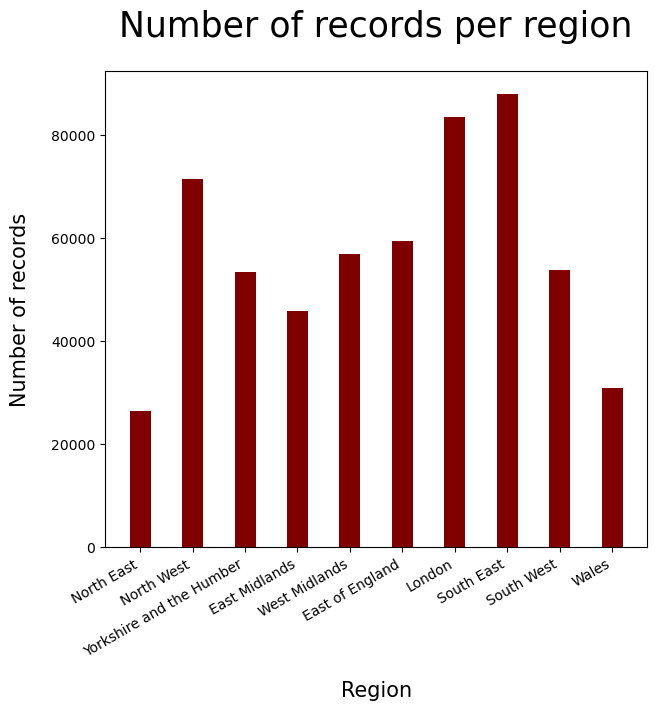

In [25]:
rg.get_bar_chart(df.Region, vf.Region, "Region", "Number of records", "Number of records per region", "../images/region_bar_chart.png")

 ### Number of records by occupation

Uses the *get_bar_chart()* function of the *refined_graphs* python script to generate a bar chart graph for the number of records by occupation.

This graph shows a fairly even spread of records per occupation, apart from the overwhelmingly large 'Not Applicable' section due to the fact 0 to 15 year olds are entered as 'Not Applicable' because they are not legally allowed to have an occupation.

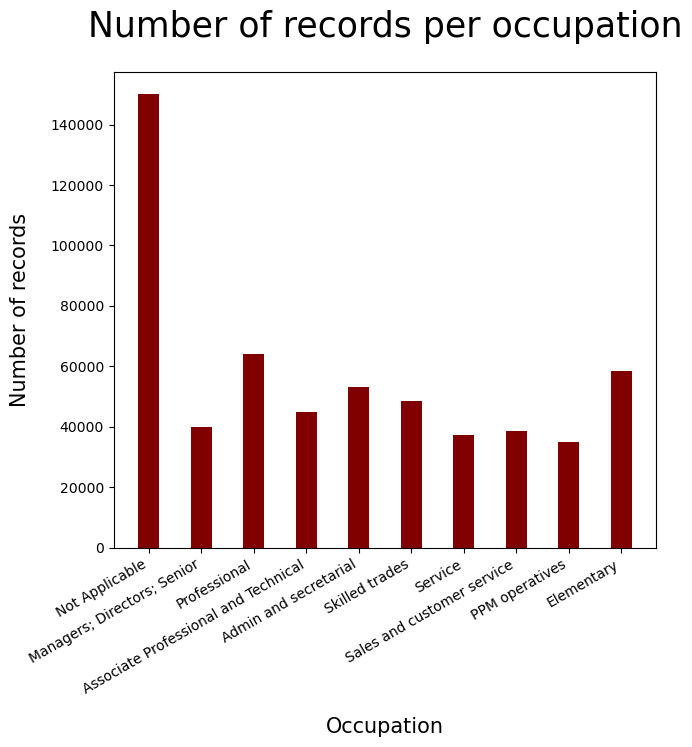

In [26]:
rg.get_bar_chart(df.Occupation, vf.Occupation, "Occupation", "Number of records", "Number of records per occupation", "../images/occupation_bar_chart.png")

### Distribution of records by age 
uses the *get_pie_chart()* function of *refined_graphs* to generate a pie chart graph for the distribution of the census by age. Takes in parameters for the dataframe column and its corresponding variable column, title and legend title. The names for each slice of the pie are assigned automatically, along with percentages showing how much of the pie each age takes up (eg., 18.8% for 0 to 15, 11.5% for 55 to 64). We used the *autopct* attribute of *pie* to add the percentages into the graph, and the *legend()* function of *pyplot* to generate the legend on the right side of the graph with the given values for the title and each section of the pie.

In this pie graph, we can see there is fairly equal representation for all age groups, with 0 to 15 year olds taking up the largest section, occupying 18.8% of the pie, and 75 and overs the least at 7.7%. Looking at a population pyramid of Britain, this is to be expected given that the elderly take up the smallest bar on the pyramid (when looking at a population pyramid of Britain in 2010, you can see that there was a larger number of children than there is today due to the cyclical nature of the UK's age makeup).

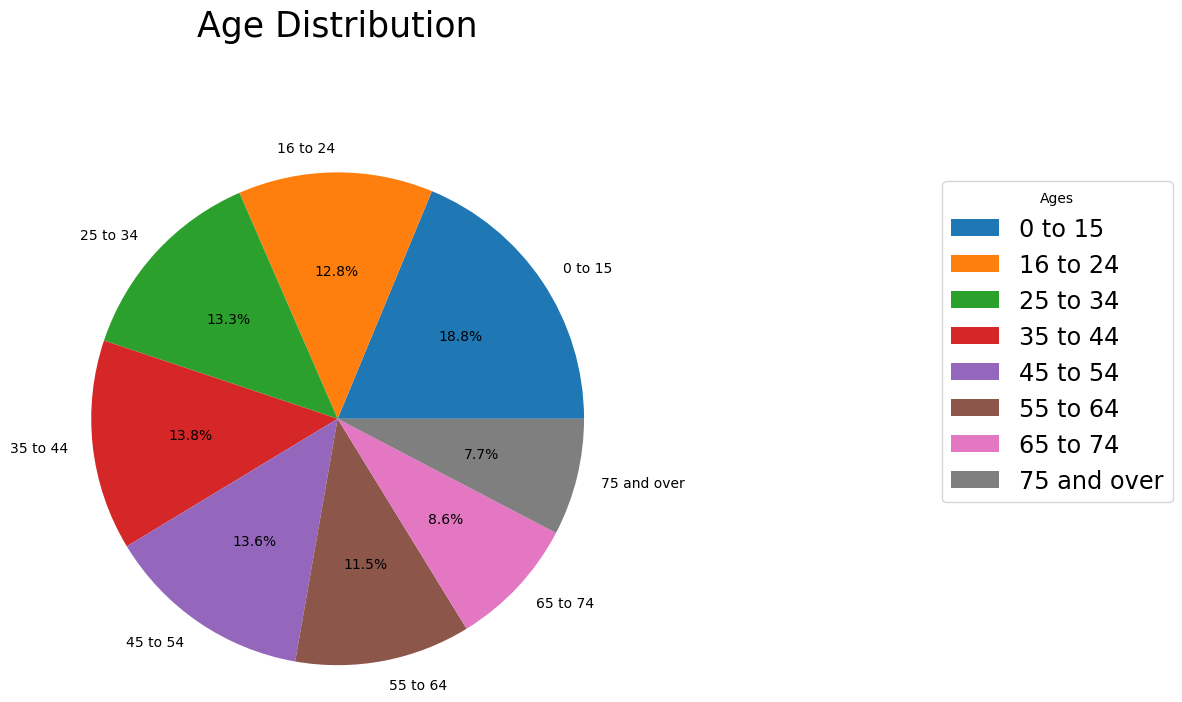

In [27]:
rg.get_pie_chart(df.Age, vf.Age, "Age Distribution", "Ages", "../images/age_pie.png")

### Distribution of records by economic activity
Building plots: uses the *get_pie_chart()* function of *refined_graphs* to generate a pie chart graph for the distribution of the census by economic activity.

In this pie graph, you can see that the largest sector by far would be 'Employee', taking up more than a third of the pie, and the second largest 'Not Applicable', taking up 19.8% of the pie. These results match up with the previous pie chart as because 0 to 15 year olds all had to enter 'Not Applicable' to Economic Activity, the 'Not Applicable' sector in this graph is almost a complete reflection of this, with there only being a 1% difference due to extraneous circumstances for people over that age entering 'Not Applicable'. The 'Retired' sector being the third largest at 17.1% in the pie is also warranted, given that it would be expected for the majority of people over 65 to enter this as their occupation, with the previous graph's percentage of people over 65 being 16.4%, closely matching the 'Retired' sector in this graph.

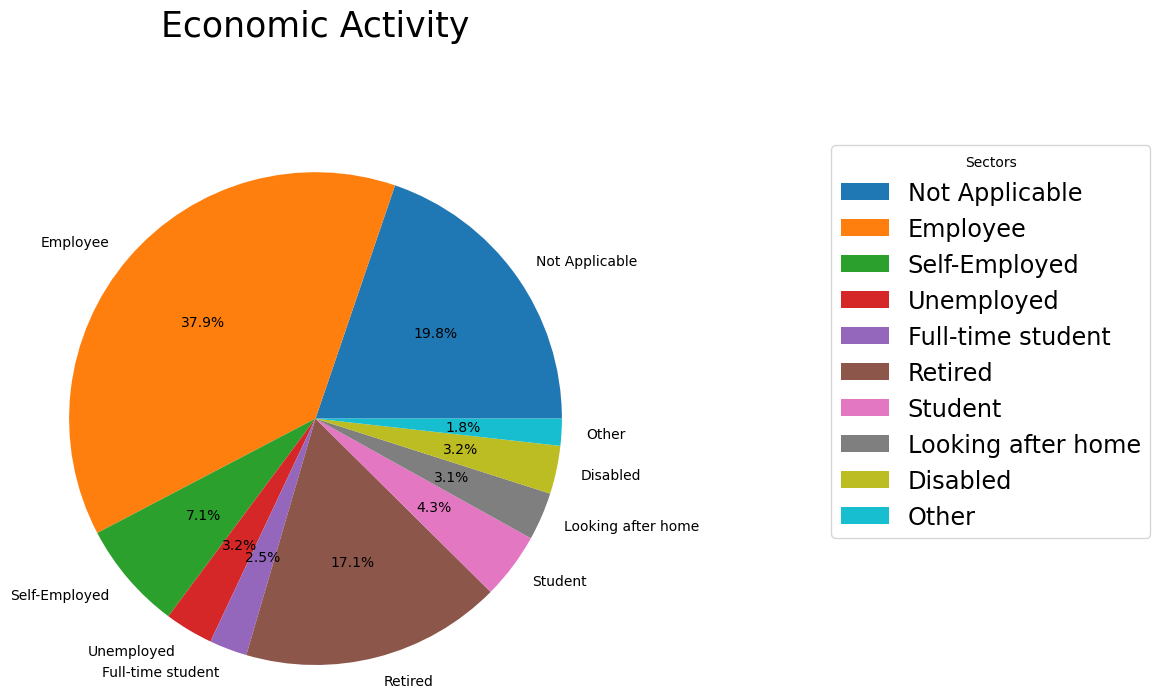

In [28]:
rg.get_pie_chart(df['Economic Activity'], vf['Economic Activity'], "Economic Activity", "Sectors", "../images/economic_activity_pie.png")

### Distribution of records by country of birth (example)
Example showing that *get_pie_chart()* can be used for any variable in the dataframe, given a dataframe column and variable column. In this case, a pie chart for the distribution of the country of birth for each participant in the census is shown.

As most people in the UK are from the UK, 85.2% of this pie is taken up by the 'UK' response, with the rest either 'Not UK' or 'Not Applicable'.

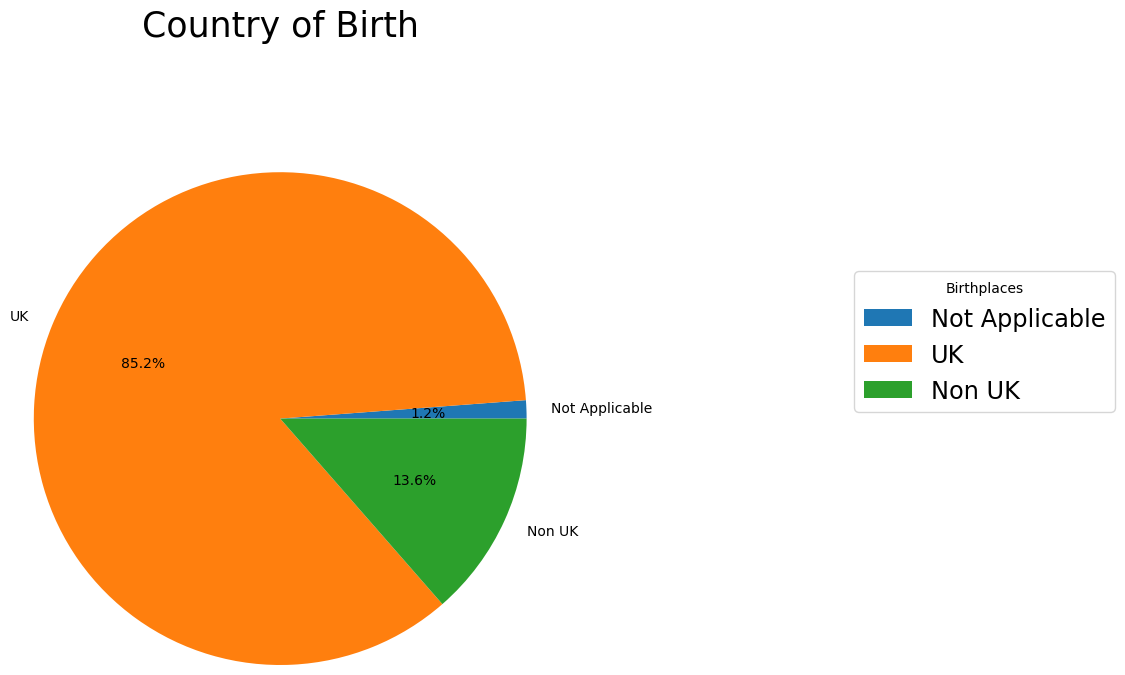

In [29]:
rg.get_pie_chart(df['Country of Birth'], vf['Country of Birth'], "Country of Birth", "Birthplaces", "../images/cob_pie.png")

### Number of records by industry (example)

Example showing that *get_bar_chart()* can be used for any variable in the dataframe, given a dataframe column and variable column. In this case, a bar chart for the number of records by industry is shown.

As we saw in the pie graph for occupations, it is no surprise that the 'Not Applicable' bar is the largest in the graph, as all 0 to 15 year olds have to give this as their answer. 

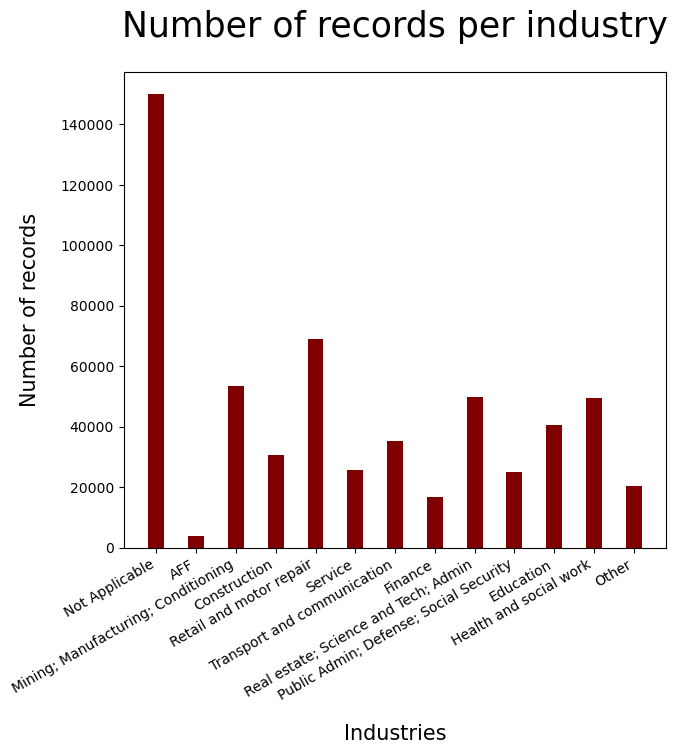

In [30]:
rg.get_bar_chart(df.Industry, vf.Industry, "Industries", "Number of records", "Number of records per industry", "../images/industry_chart.png")

## Groupby 
### Number of records by region and industry

The *getTable()* function of *groupTable* is used to automatically generate and return a dataframe consisting of a table created using the *groupby()* function of the pandas dataframe representing the census variables. To create a table using *getTable()*, the dataframe representing the census variables, the dataframe containing the textual values for each variable in the census and the two variables names to be used for the rows and columns for the table ("Region" and "Industry" in this case respectively) are passed as parameters. 

A source of difficulty when developing our solution to use *groupby()* to generate tables would be that as the column names would need to match the textual interpretations of variable values instead of just numbers (e.g, Not Applicable, AFF instead of -9, 1), we had to create two tables in *getTable()*. As the column names cannot be changed once a table has been created, to give each column the correct name, we had to iterate through each column in the first table and insert its values into a new table, assiging each column name as the corresponding value in the textual dataframe. Afterwards, when calling the *set_index()* function to set the index values for each row to the values in the textual dataframe instead of alphanumeric codes, we were able to successfully create a valid groupby table conforming to the requirements of the specification. 

In addition, although creating plots for the tables is outside of the requirements of the specifcation and is instead just a suggestion, we decided to create the *get_table_bar_chart()* function in *refined_graphs* to better illustrate our findings. As we are comparing the data from three values at the same time, we decided that the best approach we could take in generating clear, valid graphs for the tables would be to automatically create multiple graphs representing each column. For example, there are graphs for each industry and how many records exist for each region for that industry, showing that London has the smallest agriculture forestry and fishing industry (because it is large, inland city) while the South West of England has the largest (as it is by the sea and contains more countryside), whereas the finance industry in London is more than twice the size than the same industry in the South West. Therefore, it can be said that these graphs give a more complete view of the data contained in the census, allowing the average person to better understand the contents therein.  

,Not Applicable,AFF,Mining; Manufacturing; Conditioning,Construction,Retail and motor repair,Service,Transport and communication,Finance,Real estate; Science and Tech; Admin,Public Admin; Defense; Social Security,Education,Health and social work,Other
Region,,,,,,,,,,,,,
North East,6854,132,2851,1574,3087,1300,1438,524,1883,1498,1836,2524,848
North West,18755,357,7726,3778,9016,3355,3981,1597,5822,3096,4890,6764,2299
Yorkshire and the Humber,14089,362,5956,3028,6670,2555,2788,1284,4046,2141,3961,4855,1736
East Midlands,11669,429,6057,2500,6133,1936,2518,844,3299,1751,3280,3952,1414
West Midlands,15768,396,7108,2960,7067,2281,3141,1149,4284,2061,3984,4848,1828
East of England,14748,616,5302,3508,7503,2336,3841,2199,5465,2514,4291,4977,2111
London,25517,55,3266,3700,8204,4054,6570,4016,9968,3015,5373,6109,3735
South East,22246,510,6651,4896,10548,3566,6502,3059,8708,4145,6593,7344,3316
South West,12401,697,5012,3033,6899,2712,2961,1510,4475,2973,4039,5085,1977


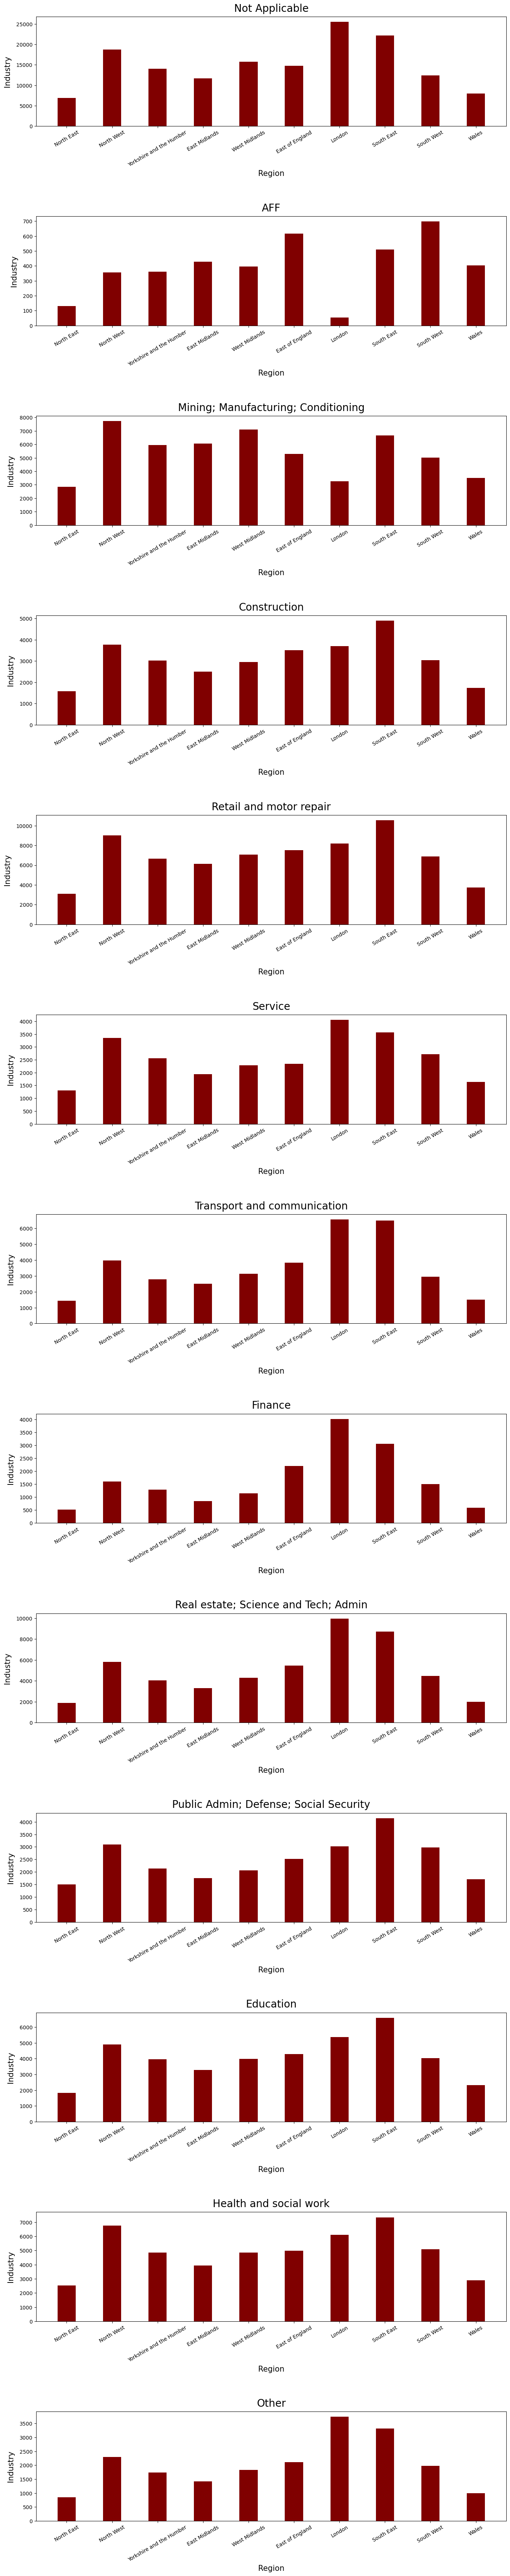

In [31]:
dt = gt.getTable(df, vf, "Region", "Industry")
rg.get_table_bar_chart(dt, "Region", "Industry", 15, 70)
dt

### Number of records by occupation and social grade

The *getTable()* function of groupTable is used to automatically generate a table containing the number of records by occupation and social grade. The *get_table_bar_chart()* function is then used to generate a set of bar graphs representing the information contained in this table.

In the table and the bar graphs, you can see that professionals picked 'AB' the most, which makes sense as because a professional worker would have a high wage, you would expect them to have a higher quality of life and thus more social status, raising their social grade. You can also see that those working in elementary work (e.g., manual labour) mostly selected 'DE' as their social grade, most likely due to the lower wages earned by these types of workers.

,Not Applicable,AB,C1,C2,DE
Occupation,,,,,
Not Applicable,116915,1051,17787,2062,12169
Managers; Directors; Senior,492,19190,18555,584,967
Professional,884,48104,13223,891,1009
Associate Professional and Technical,819,7050,35435,647,986
Admin and secretarial,727,3000,44922,2353,2252
Skilled trades,678,585,2464,37190,7629
Service,478,1061,6343,15555,13860
Sales and customer service,1031,964,12184,2997,21347
PPM operatives,441,413,1719,11157,21088


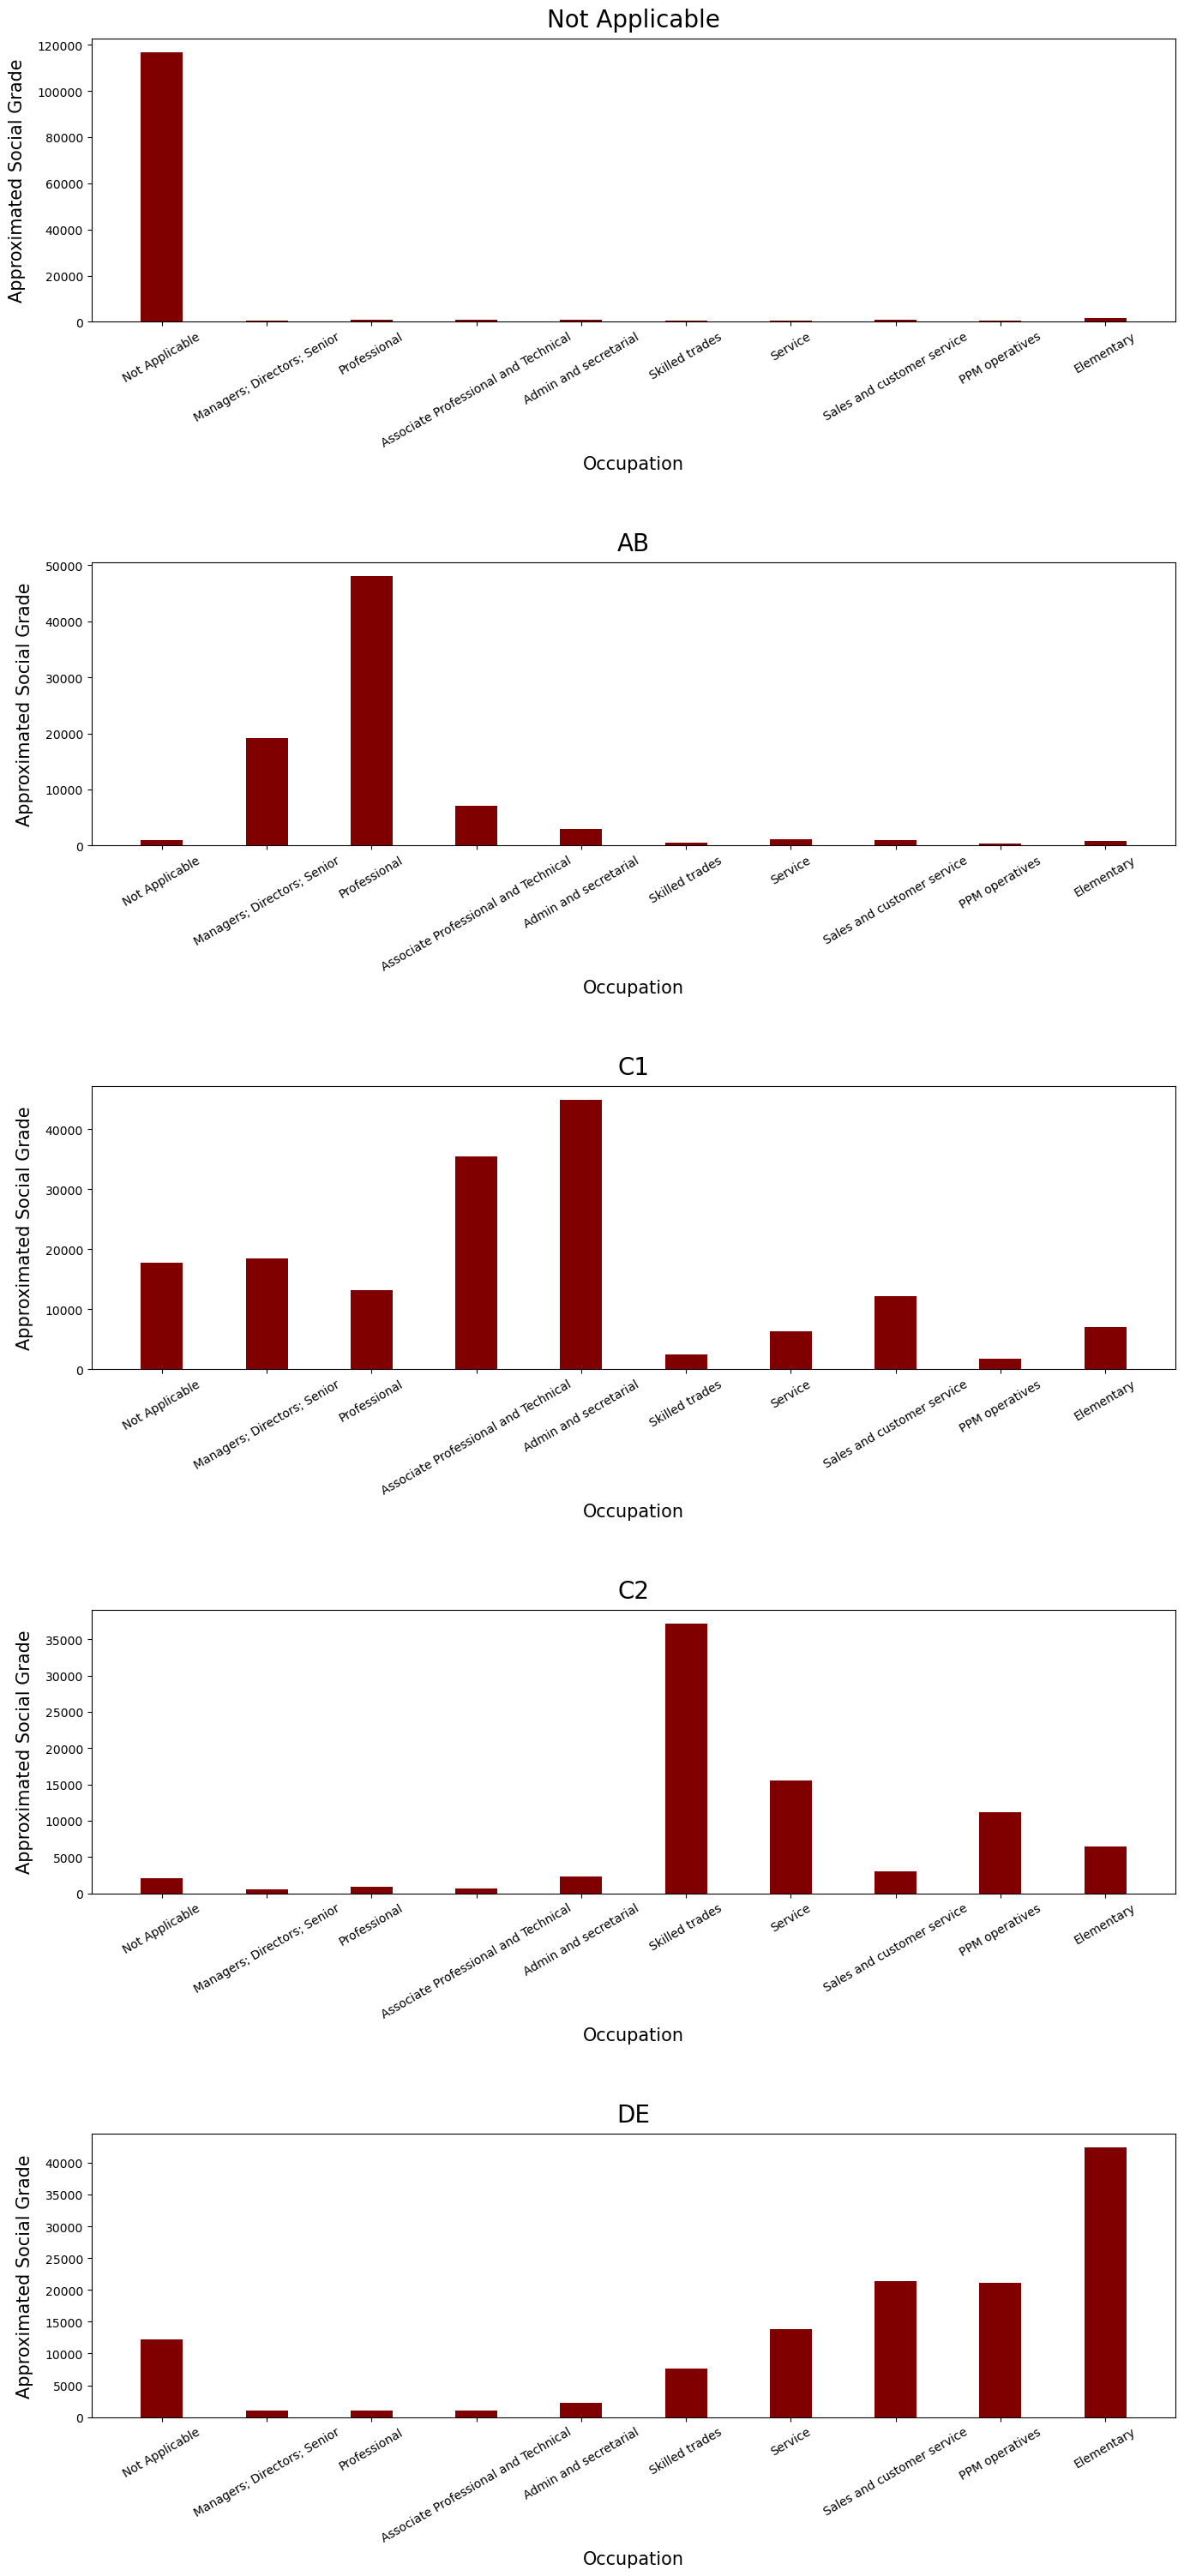

In [32]:
dt = gt.getTable(df, vf, "Occupation", "Approximated Social Grade")
rg.get_table_bar_chart(dt, "Occupation", "Approximated Social Grade", 15, 30)
dt

## Queries 
### Number of economically active people by region

To find the number of economically active people by region, we first used the *getTable()* function defined in the previous requirement to generate a table based on the number of records by region and economic activity. However, as this requirement is looking for the number of *economically active* people rather than the activities each person was participating in themselves, we created another dataframe to store this information. Using the MicroDataTeachingVariables.pdf file, we found that 'Retired', 'Student', 'Looking after home', 'Disabled' and 'Other' were marked as economically inactive, and 'Employee', 'Self-Employed', 'Unemployed' and 'Full-time student' were marked as economically active (we also included 'Not Applicable' as economically inactive). Therefore, by using *drop()* on each column that contained irrelevant data for "Economically Active" and "Economically Inactive" respectively and the *sum()* function to add the values of every remaining column together, we managed to gather the number of economically active people by region as well as how many were inactive. To make this information more plain to see, we added this information into a table by region and then passed this table into the *get_table_bar_chart()* function to generate appropriate bar graphs for our findings. 

We found that the number of economically active and economically inactive workers by region was roughly equal, with London containing the highest ratio of economically active workers with there being around 5000 more active workers than inactive, and Wales the highest ratio of inactive to active, having 1200 more people out of work than in work.

,Economically active,Economically inactive
Region,,
North East,12897,13452
North West,35204,36232
Yorkshire and the Humber,26843,26628
East Midlands,23106,22676
West Midlands,27930,28945
East of England,30568,28843
London,44454,39128
South East,45551,42533
South West,27453,26321


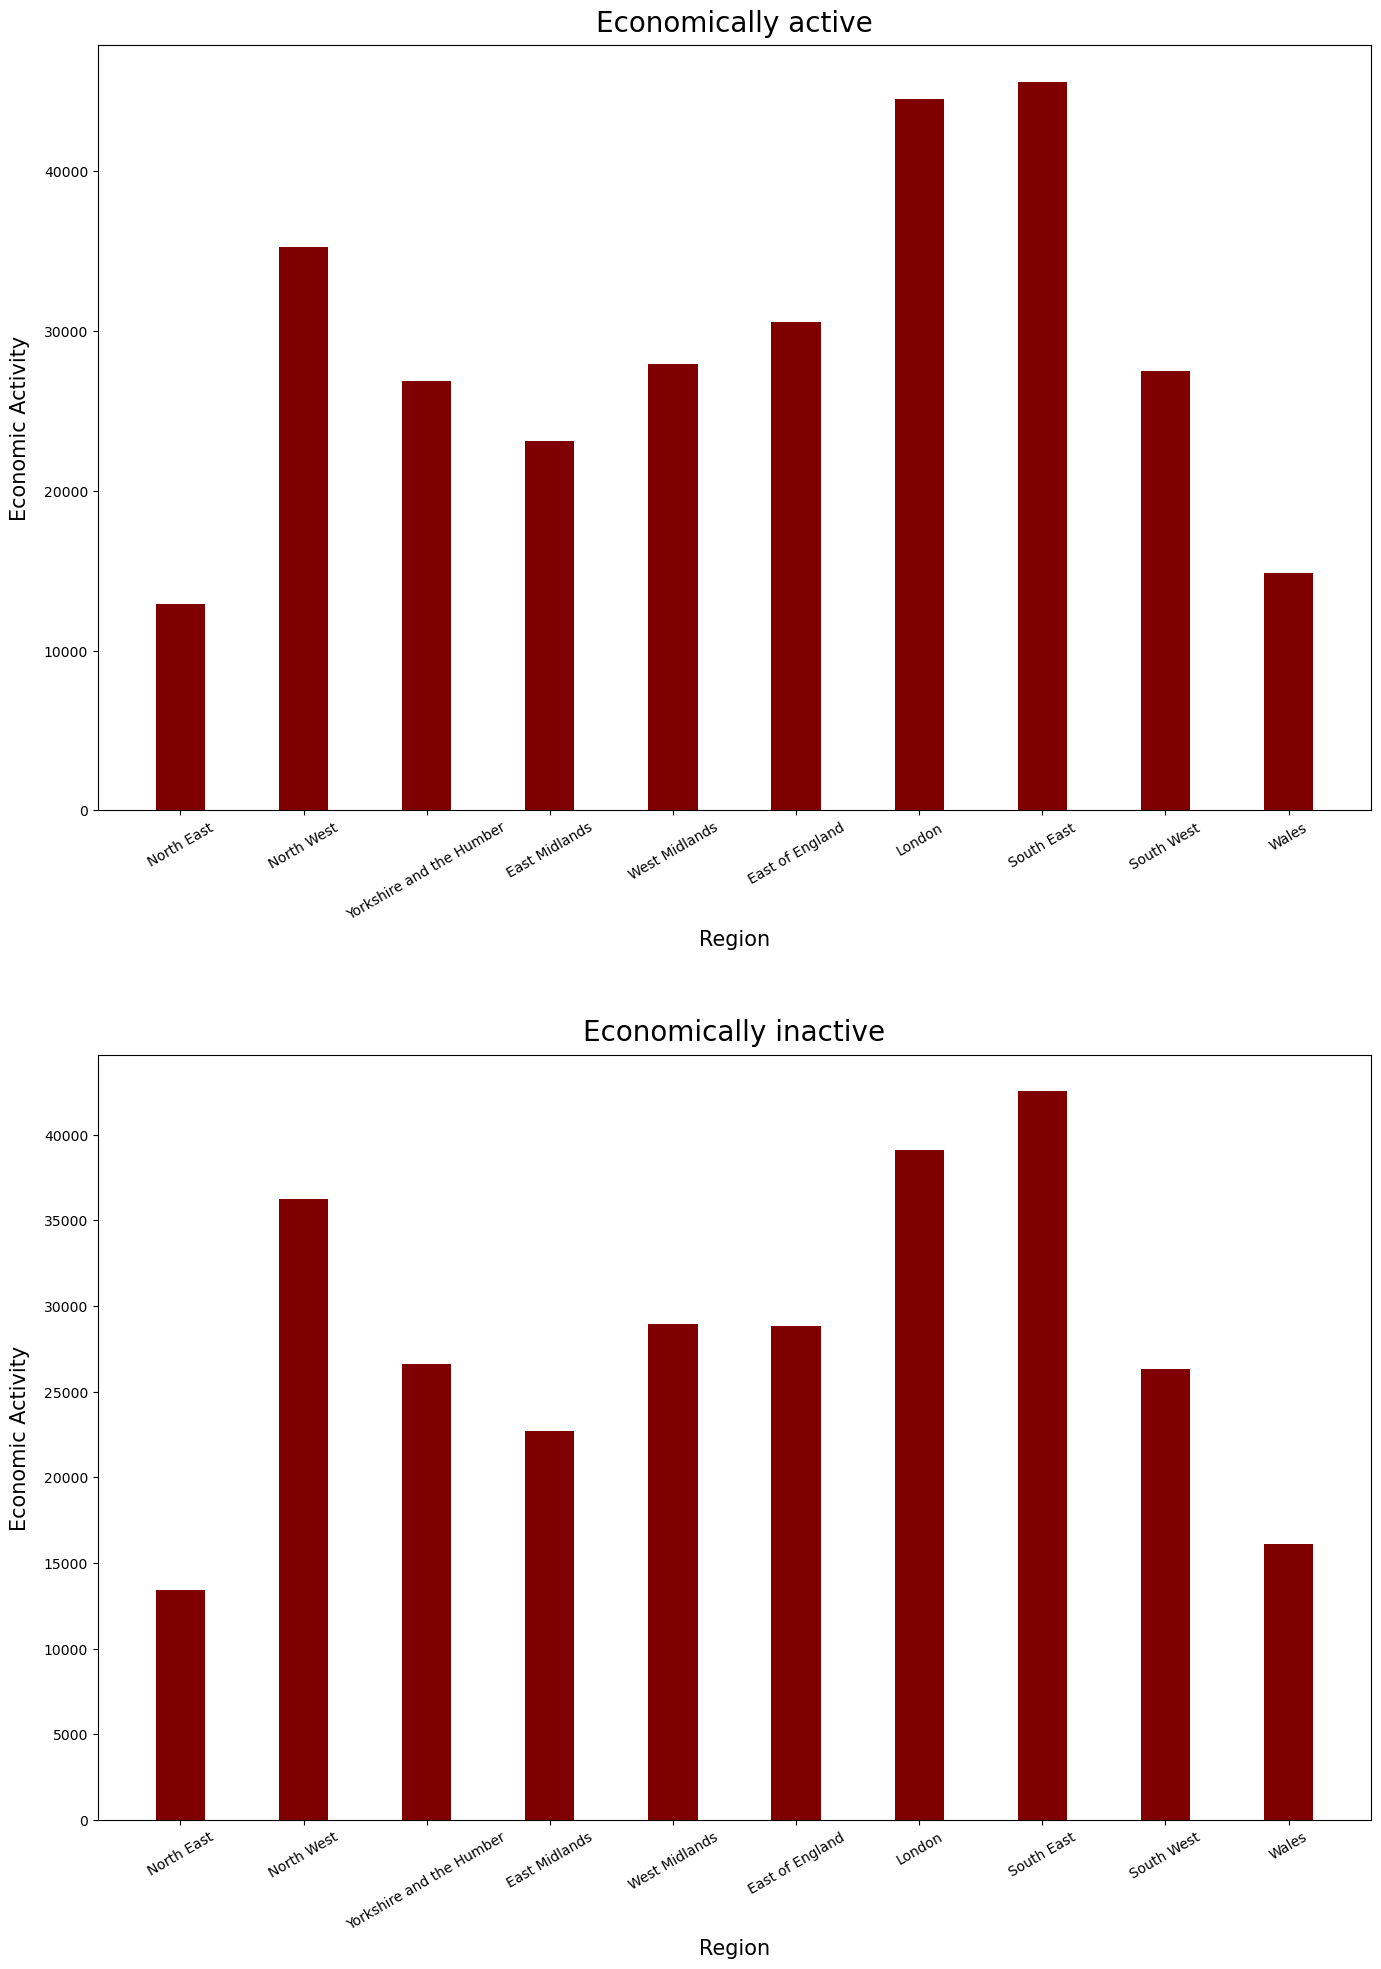

In [33]:
dt = gt.getTable(df, vf, "Region", "Economic Activity")
dt2 = pd.DataFrame()
dt2.insert(0, "Economically active", dt.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt2.insert(1, "Economically inactive", dt.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt2 = dt2.set_index(vf["Region"].dropna())
rg.get_table_bar_chart(dt2, "Region", "Economic Activity", 15, 20)
dt2

### Number of economically active people by age

To find the number of economically active people by age, the same process to find the number of economically people by region was used, the only value changed being the variable analysed, "age". 

We found that as 0 to 15 year olds legally are not allowed to have an occupation, all of them are marked as inactive (106832 records). The other ages follow something akin to an arch for being in active work, and a bowl for inactivity. As people start working from 16 to 24, peak in their 30s, 40s and 50s, and retire in their 60s and 70s, the results shown in the bar graphs below are unsurprising. 

,Economically active,Economically inactive
Age,,
0 to 15,0.0,106832.0
16 to 24,41663.0,31122.0
25 to 34,64326.0,11622.0
35 to 44,67050.0,11591.0
45 to 54,65736.0,11652.0
55 to 64,40584.0,25082.0
65 to 74,8022.0,40755.0
75 and over,1502.0,42202.0


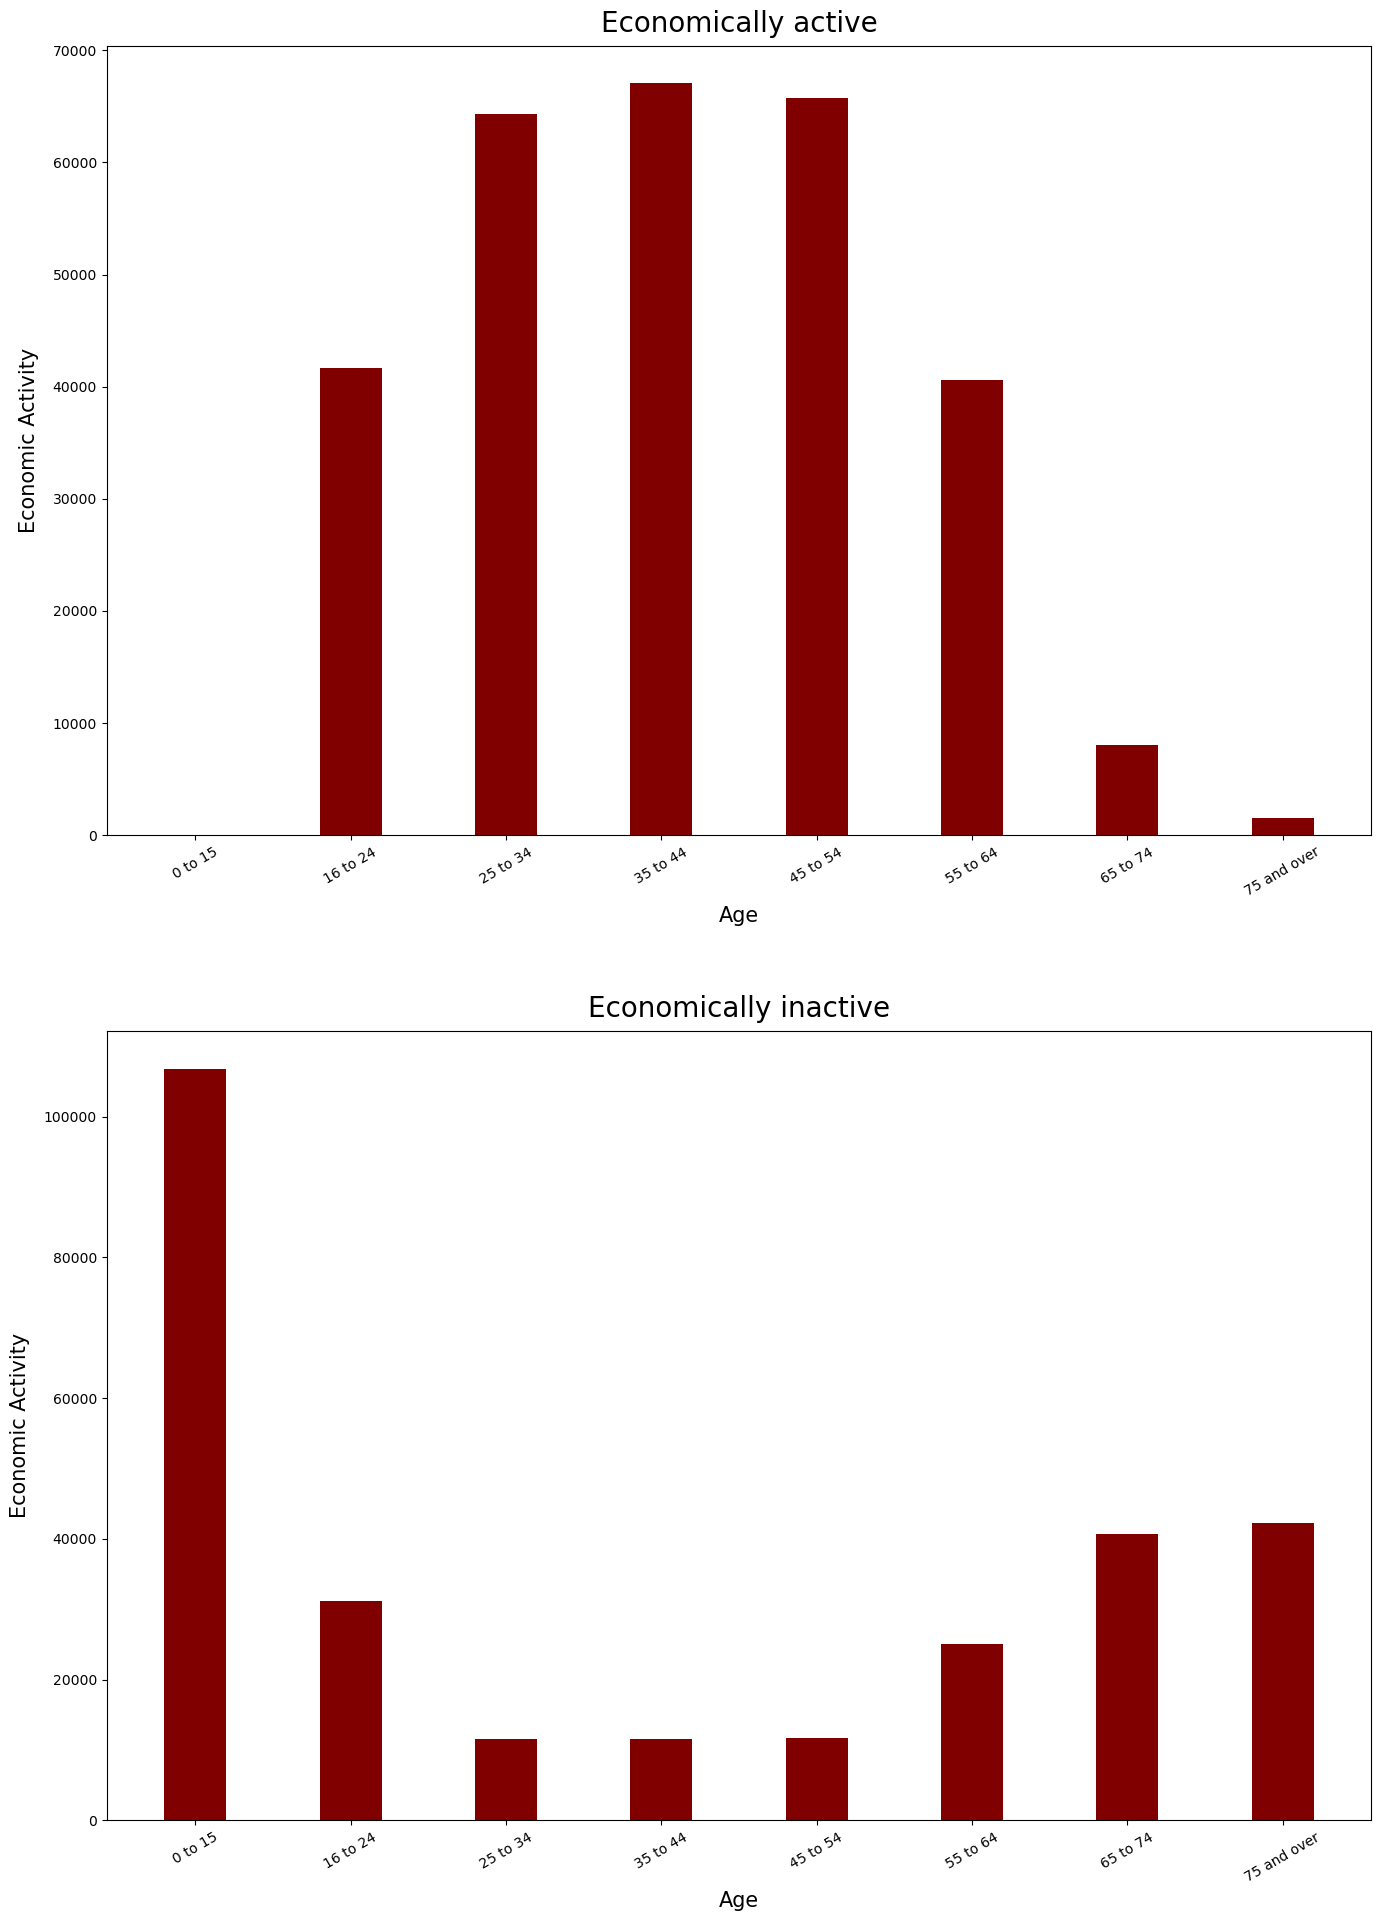

In [34]:
dt = gt.getTable(df, vf, "Age", "Economic Activity")
dt2 = pd.DataFrame()
dt2.insert(0, "Economically active", dt.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt2.insert(1, "Economically inactive", dt.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt2 = dt2.set_index(vf["Age"].dropna())
rg.get_table_bar_chart(dt2, "Age", "Economic Activity", 15, 20)
dt2

### Student discrepencies in economic activity

To find if there were any discrepencies given by people marked as students in the census in regards to their answers to the question "Student (Schoolchild or full-time student)" and "Economic Activity", we employed a similar process to the last few requirements and used the*groupby()*, *drop()* and *sum()* functions to find the answers to this question. 

First, we created a dataframe table containing the number of records by students and economic activity and dropped the "No" category from table to see if any students marked their economic activity as something other than being a student. The total number of records for "yes" and the number of records for "yes" and specifically the 'Not Applicable','Full-time student' and 'Student' columns are then compared to see if they are the same. We found that this number was the same, so it can be said that there were no discrepencies in the census in this case.

Next, we dropped the 'Yes' column from the table so that we could check if anyone said 'No' to being a student but still marked their economic activity as being a student. We found that there was a discrepency in this case, with there being 918 people claiming not to be a student yet marking their economic activity as being a student.

In [35]:
dt = gt.getTable(df, vf, "Student", "Economic Activity")
yesCount = dt.drop(['No'])[['Not Applicable','Full-time student', 'Student']].sum().sum()
actualYes = dt.drop(['No']).sum().sum()
if (actualYes != yesCount):
    print(f"Discrepancy detected: {actualYes - yesCount} people claim to be a student but file themselves as being otherwise.")
noCount = dt.drop(['Yes'])[['Full-time student', 'Student']].sum().sum()
if (noCount > 0):
    print(f"Discrepancy detected: {noCount} people claim to not be a student while filing their economic activity as being a student.")

Discrepancy detected: 918.0 people claim to not be a student while filing their economic activity as being a student.


### Number of hours worked per week by students

To find the number of hours worked per week by students, once again we created a table with *groupby()*, this time consisting of the number of records by the hours worked per week and economic activity. Selecting only the columns for 'Full-time student' and 'Student', we used the *sum()* function to count how many records there were for students for each hour category in total. As the hour categories consist of a range of hours and not an exact amount of time (e.g., 15 or less, 31 to 48), we made the decision to first find the minimum and maximum possible hours students could have worked, and then averaged them out to find a more realistic amount of hours worked by students per week. We found that the minimum amount of hours was 109751, and the maximum 261548, giving an average of 185649.5 hours worked per week. 

In [36]:
dt = gt.getTable(df, vf, "Hours worked per week", "Economic Activity")
studentHours = dt[['Full-time student', 'Student']]

low = studentHours.loc['15 or less'].sum().sum()
med = studentHours.loc['16 to 30'].sum().sum()
high = studentHours.loc['31 to 48'].sum().sum()
very_high = studentHours.loc['49 or more'].sum().sum() 

minHours = ((low * 1) + (med * 16) + (high * 31) + (very_high * 49))
maxHours = ((low * 15) + (med * 30) + (high * 48) + (very_high * 49))
print(f"The total number of hours worked by students per week is between {minHours} and {maxHours}+, an average of ~{(minHours+maxHours)/2} hours.")

The total number of hours worked by students per week is between 109751.0 and 261548.0+, an average of ~185649.5 hours.


## 3D Graphs
### Number of records by region and industry
As this requirement specifies that we must create 3D graphs of the tables detailed in the first easy requirement, given how we used a set of 2D bar graphs to represent the tables previously, we decided that the 3D interpretation of these tables would combine each 2D graph together to form a 3D bar graph. We created a new function in *refined_graphs* called *get_table_3d_chart()* to achieve this, with this function taking in arguments for a dataframe table, x, y, and z axis titles and width and height parameters. Using an example of a 3D bar graph given on the matplotlib website as a point of reference for our implementation, we created a 3D graph generator to fit our design. 

However, we did find difficulty configuring our graph to have valid x and y labels, and for each 2D bar graph in the 3D graph to be laid out on one plain at a time (the placement of each bar originally only conformed to the z axis, making the graphs impossible to make sense of). Through careful analysis of how matplotlib generated the graphs when given specific arguments, and by using functions liked *set_yticks()*, *tick_params()* and *autofmt_xdate()* to properly configure the labels for each axis so that they were both readable and relevant to the table we were representing in a graphical format, we managed to iron out any inconsistencies between our implementation of the 3D bar graphs and our original vision of how they would be laid out.

Below is a 3D bar chart representing the number of records by region and industry, with the regions on the x axis, the industries on the y axis and the number of records on the z axis. Comparing each bar graph to the 2D set of bar graphs generated for the region and industry table previously, you can see that the data in the 3D graph matches up exactly with our 2D representations. Furthermore, the 3D graph is also less misleading in terms of the number of records contained for each industry, as with the addition of a z axis the average reader can clearly see the 'Health and social work' column is much larger than the 'Other' column. In the 2D graphs, this difference would be harder to see as each graph was the same size, making it look as though there was an equal amount of records for every industry (without properly checking the y axis values!).

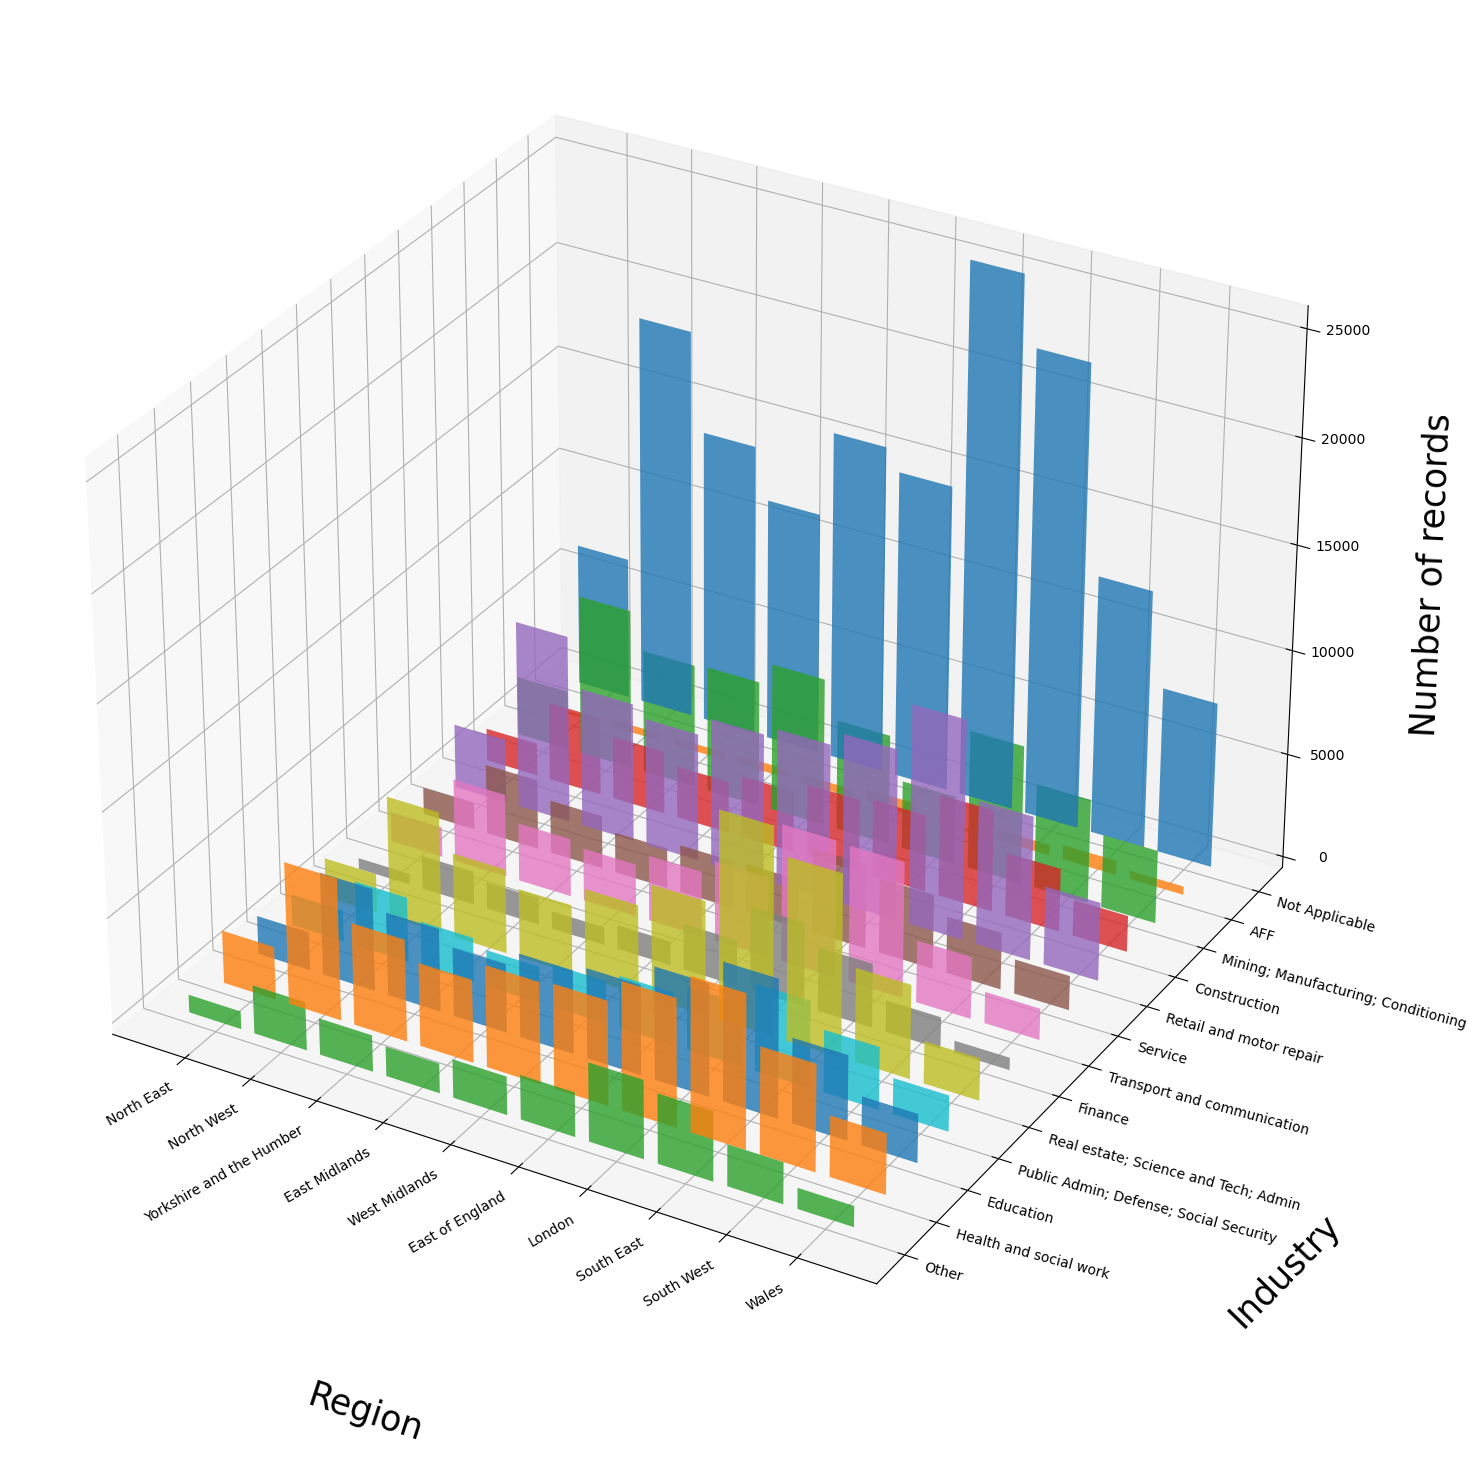

In [37]:
dt = gt.getTable(df, vf, "Region", "Industry")
rg.get_table_3d_chart(dt, "Region", "Industry", "Number of records", 20, 20)
plt.show()

### Number of records by occupation and social grade

Below is a 3D bar chart representing the number of records by occupation and approximated social grade, with the *getTable()* function used to generate a *groupby()* table with occupation and approximated social grade as the rows and columns respectively, and the *get_table_3d_chart()* function used to generate the 3D graphical representation of this table. The data contained in this graph matches up exactly with the 2D bar graphs generated previously for the number of records by occupation and social grade, with each social grade taking up a place on the y axis starting at 'DE', the occupations on the x axis and the number of records on the z axis.

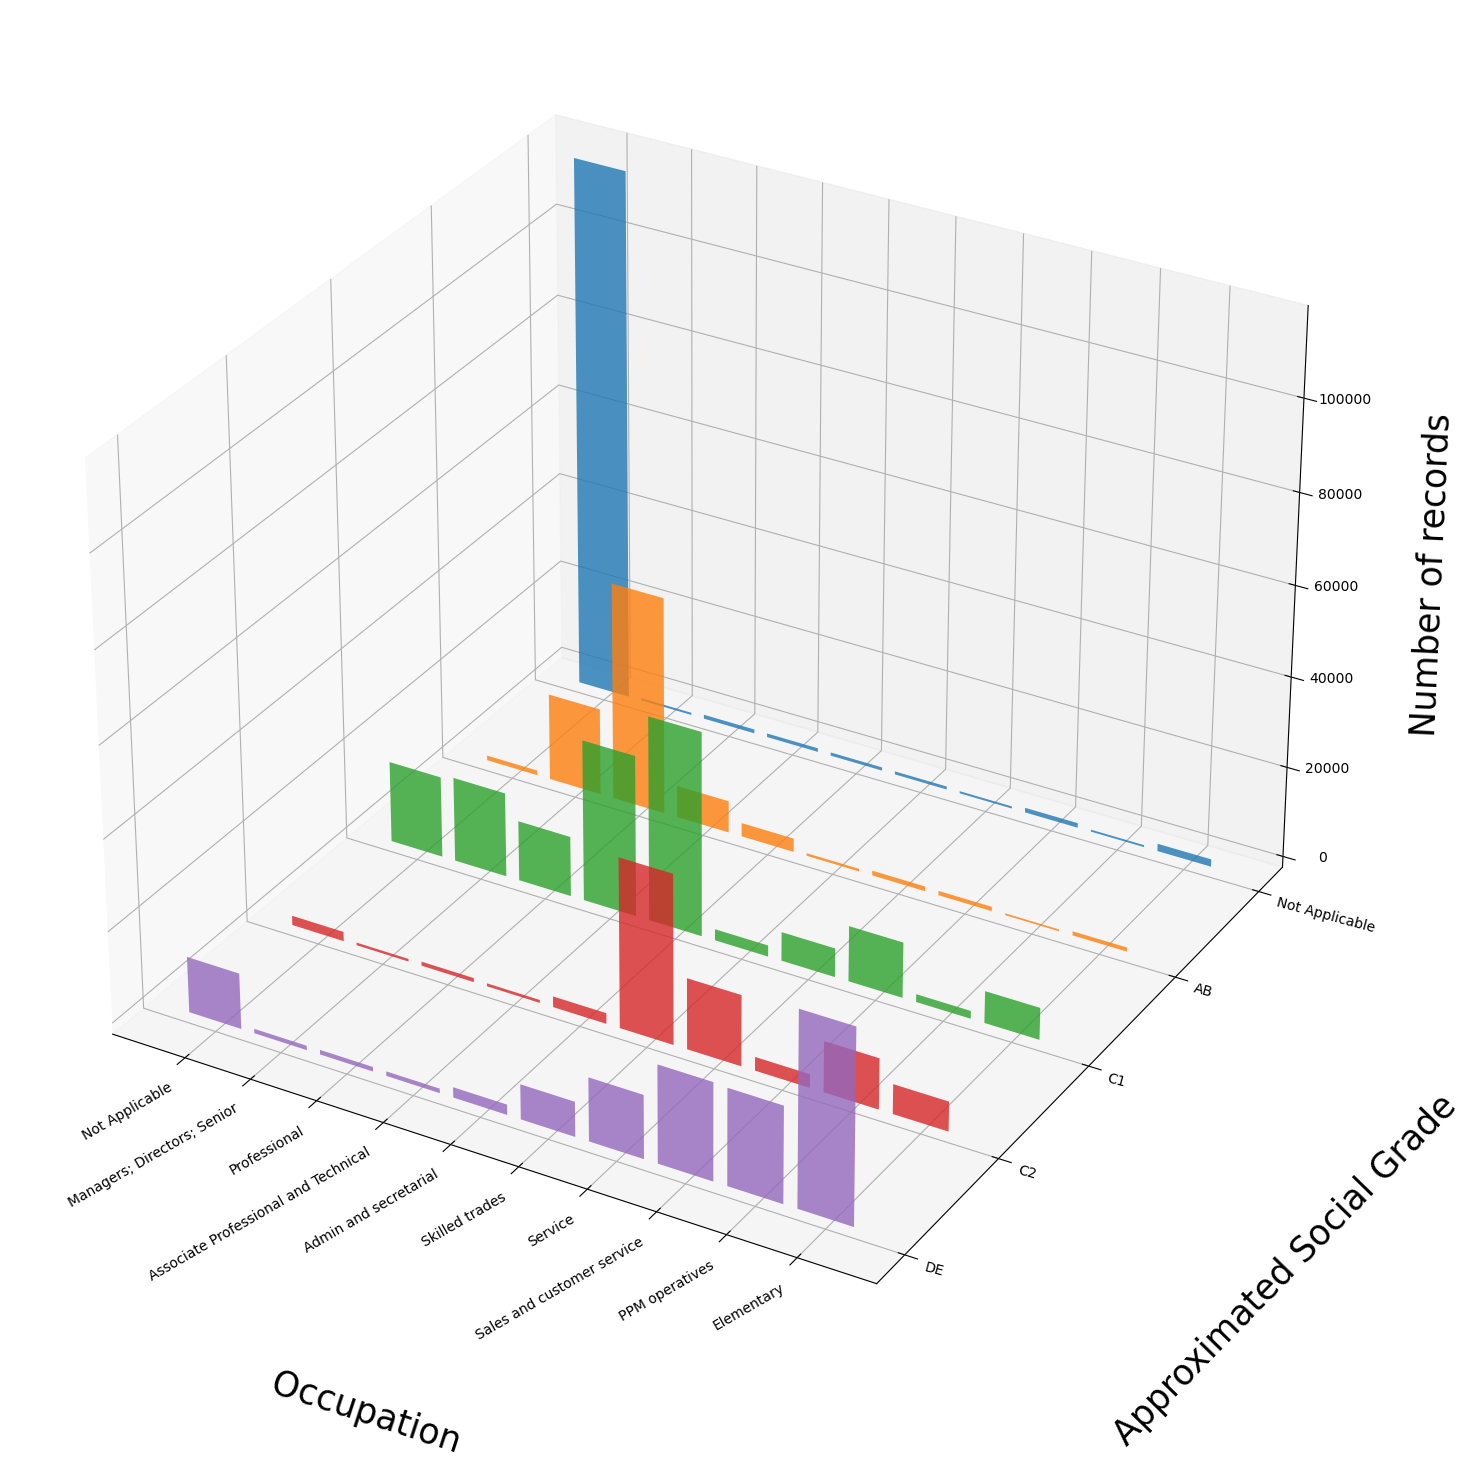

In [38]:
dt = gt.getTable(df, vf, "Occupation", "Approximated Social Grade")
rg.get_table_3d_chart(dt, "Occupation", "Approximated Social Grade", "Number of records", 20, 20)
plt.show()

### Number of records by region and economic activity (example)

Example of a 3D graph, used to represent economic activity and inactivity by region (2nd easy requirement)

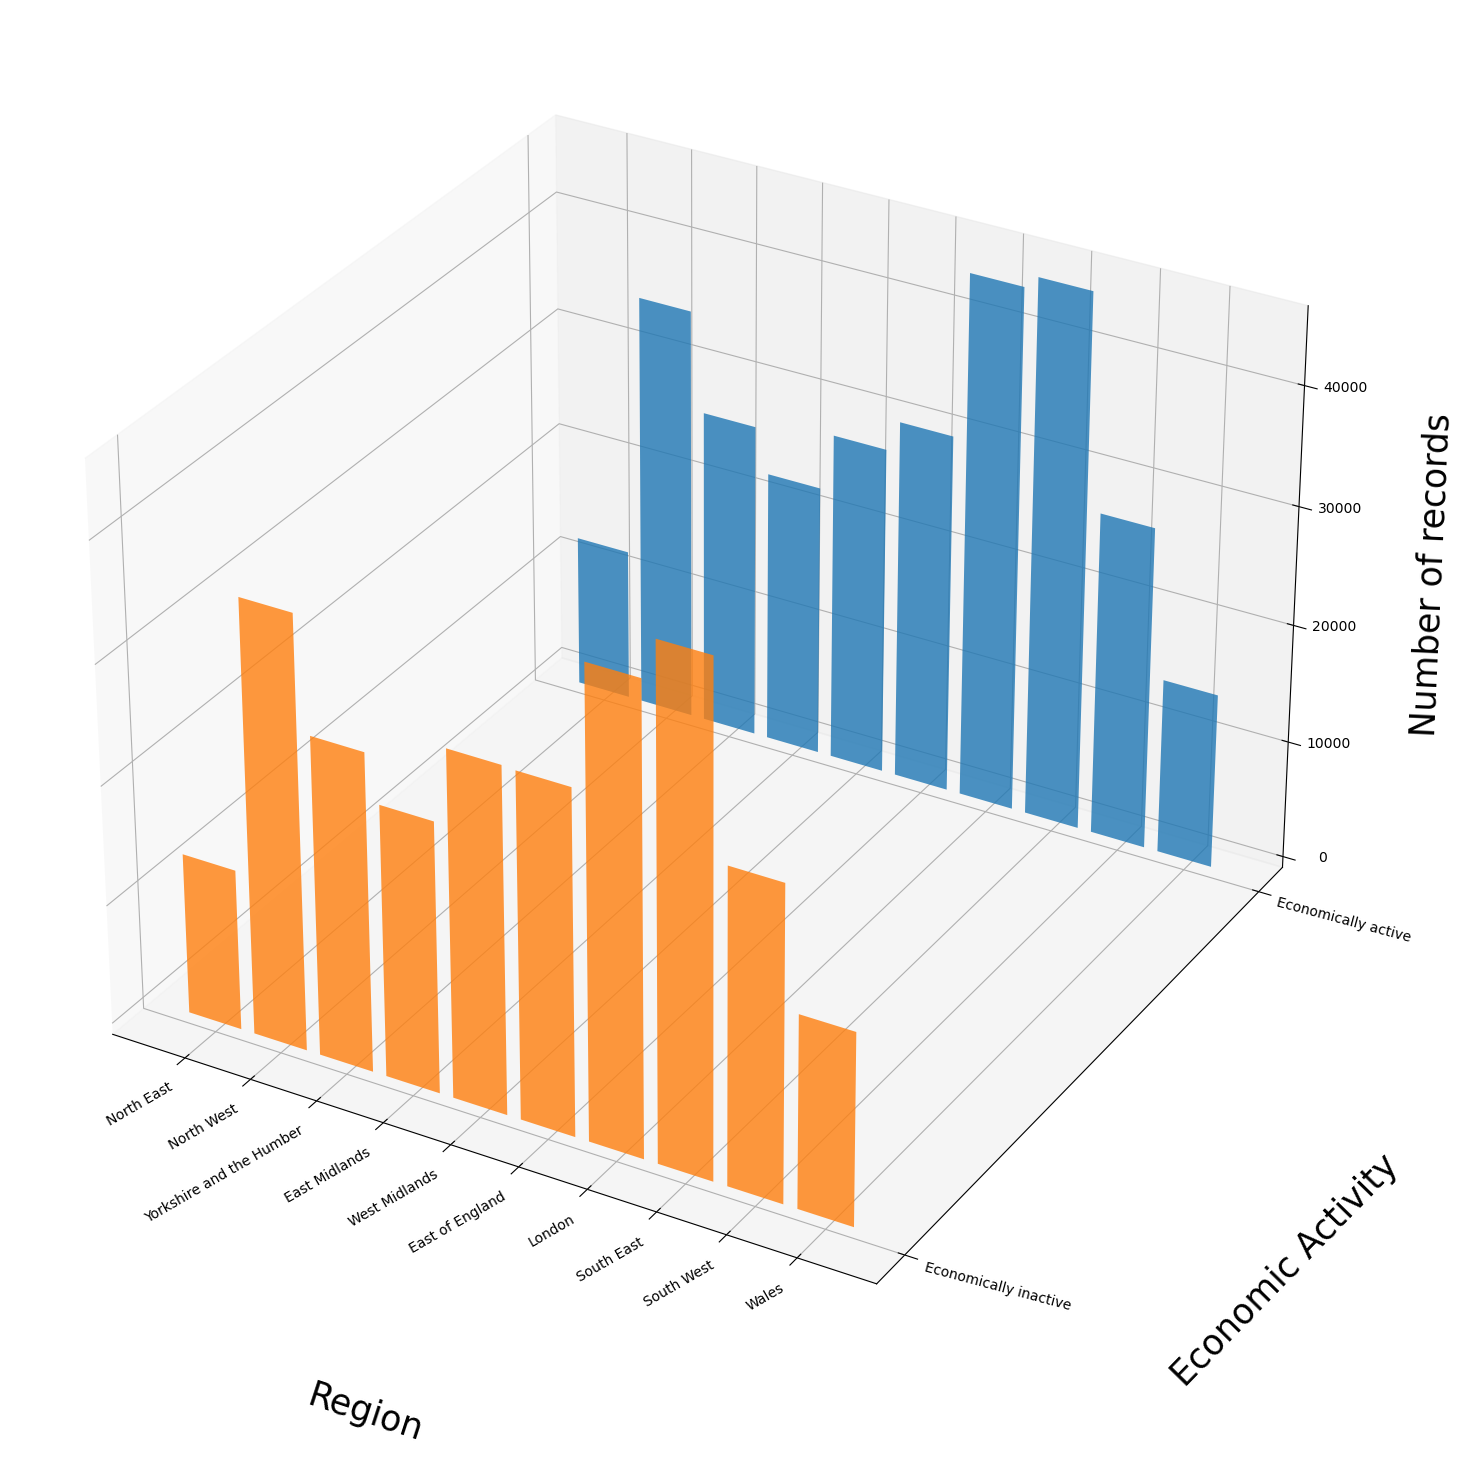

In [39]:
dt = gt.getTable(df, vf, "Region", "Economic Activity")
dt2 = pd.DataFrame()
dt2.insert(0, "Economically active", dt.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt2.insert(1, "Economically inactive", dt.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt2 = dt2.set_index(vf["Region"].dropna())
rg.get_table_3d_chart(dt2, "Region", "Economic Activity", "Number of records", 20, 20)

### Number of records by age and economic activity (example)

Example of a 3D graph, used to represent economic activity and inactivity by age (2nd easy requirement)

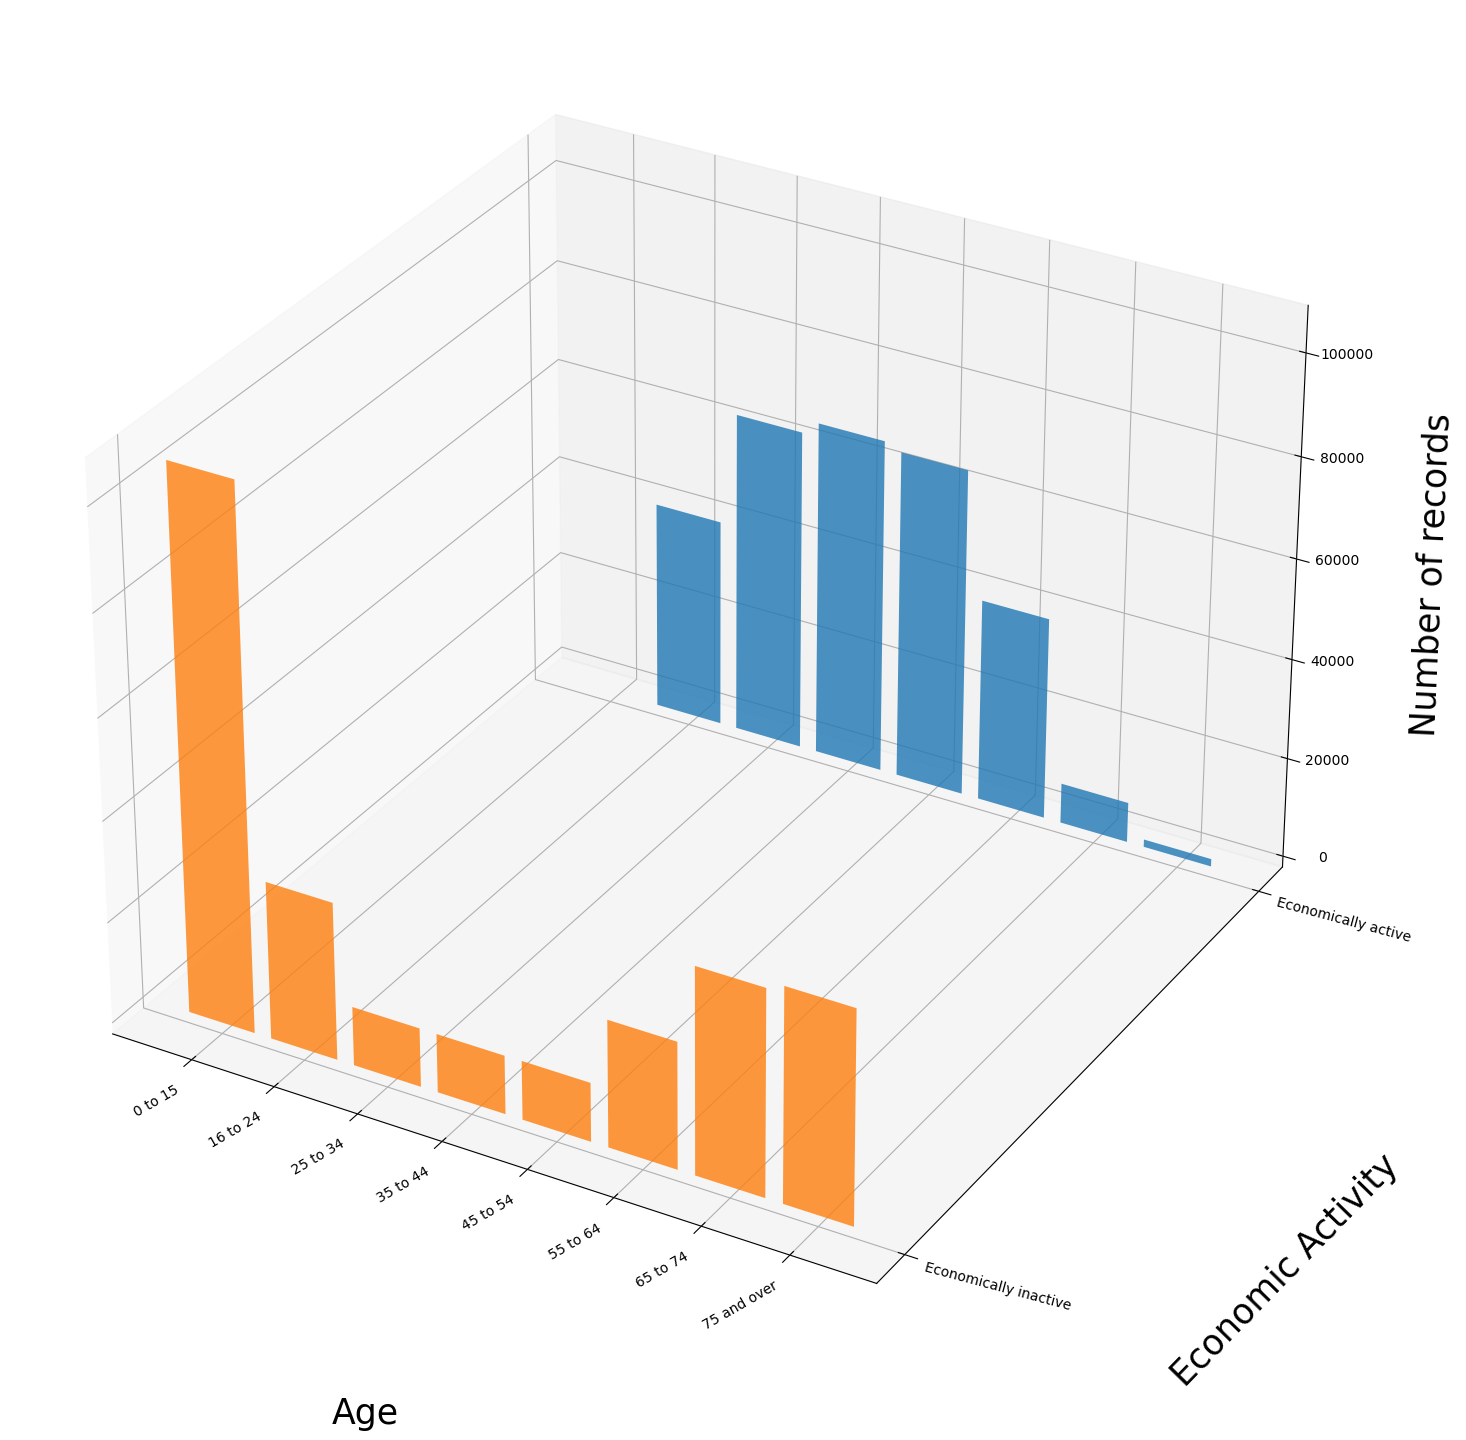

In [40]:
dt = gt.getTable(df, vf, "Age", "Economic Activity")
dt2 = pd.DataFrame()
dt2.insert(0, "Economically active", dt.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt2.insert(1, "Economically inactive", dt.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt2 = dt2.set_index(vf["Age"].dropna())
rg.get_table_3d_chart(dt2, "Age", "Economic Activity", "Number of records", 20, 20)

## Bibliography

Some sources we used for help in the development of our project:

* for formatting images:
https://stackoverflow.com/questions/50341684/savefig-do-not-correctly-save-the-displayed-plot
https://stackoverflow.com/questions/27204646/matplotlib-pyplot-has-no-attribute-style
https://medium.com/@akaivdo/3-methods-to-save-plots-as-images-or-pdf-files-in-matplotlib-96a922fd2ce4

* type of each variable:
https://pbpython.com/pandas_dtypes.html

* helping to iterate through columns:
https://stackoverflow.com/questions/23197324/pandas-value-counts-applied-to-each-column

* checking if two dataframes contain no differences:
https://saturncloud.io/blog/how-to-confirm-equality-of-two-pandas-dataframes/

* don't cover main:
https://stackoverflow.com/questions/65592626/how-to-test-if-name-main-to-increase-coverage

* removing a file in unittest:
https://stackoverflow.com/questions/25615459/how-to-delete-a-test-file-after-finished-testing-in-python

* annoying list error:
https://stackoverflow.com/questions/51451951/keyerror-in-pandas-on-selecting-multiple-columns

* 3D bar graphs:
https://matplotlib.org/stable/gallery/mplot3d/bars3d.html

* Reverse column index:
https://www.geeksforgeeks.org/how-to-reverse-the-column-order-of-the-pandas-dataframe/

* Sort value_counts():
https://medium.com/@siglimumuni/a-complete-guide-to-the-value-counts-method-in-pandas-a8c24296be2d

* iterating through two lists in parallel (for tests):
https://stackoverflow.com/questions/1663807/how-do-i-iterate-through-two-lists-in-parallel

* checking if a column exists in a dataframe:
https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas